In [46]:
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SVMSMOTE
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.metrics import hinge_loss
from numpy import mean
from numpy import std
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [47]:
data= pd.read_csv("Pokemon.csv")
data2=data

In [48]:
map_dict = {False:1,True:-1}
y = data['Legendary'].map(map_dict);
data2=data.drop(['#','Name','Type 2','Legendary','Type 1'],axis=1)
x=data2

In [49]:
col_names = list(data2.columns)
scaler = StandardScaler()
pre= scaler.fit(data2)
x= scaler.transform(data2)
x= pd.DataFrame(x, columns=col_names)

In [50]:
oversample = SVMSMOTE()
bx,by = oversample.fit_resample(x,y)

In [56]:
skf =StratifiedKFold(n_splits=10)

outer_results=[]
loss=[]

for train, test in skf.split(bx,by):
    
    xtrain, xtest = bx.iloc[train],bx.iloc[test]
    ytrain, ytest = by[train],by[test]
    
    cv_inner = KFold(n_splits=5, shuffle=True, random_state=1)
    svm=SVC()
    param_grid = {'kernel': ['poly'],'gamma':[0.01,0.1],'probability':[True]}
    search = GridSearchCV(svm,param_grid, scoring= 'roc_auc', cv=cv_inner, refit=True)

    search.fit(xtrain,ytrain)
    ypred =search.predict(xtest)
    
    acc = accuracy_score(ytest,ypred)
    outer_results.append(acc)

    loss.append(hinge_loss(ytest, ypred))
    
print('Accuracy: %.3f (%.3f)' % (mean(outer_results)*100, std(outer_results)))

Accuracy: 97.279 (0.015)


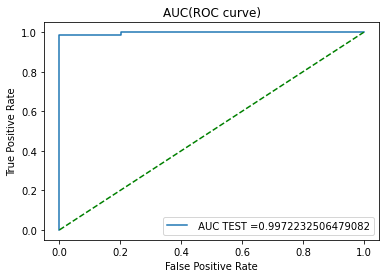

In [57]:
#ROC CURVE

probabilities = search.predict_proba(xtest)

y_proba = probabilities[:, 1]

test_fpr, test_tpr, thresholds = roc_curve(ytest, y_proba, pos_label=1)
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))

plt.plot([0,1],[0,1],'g--')
plt.legend()

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.show()

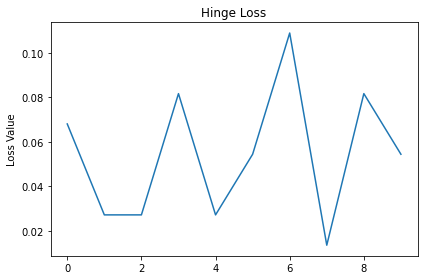

In [65]:
#LOSS CURVE
plt.plot(loss)
plt.title('Hinge Loss')
plt.ylabel('Loss Value')
plt.tight_layout()
plt.show()

[[74  0]
 [ 4 69]]


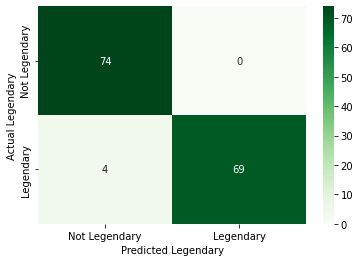

In [66]:
#Confusion Matrix
cfmatrix =confusion_matrix(ytest,ypred)
print(cfmatrix)
ax = sns.heatmap(cfmatrix, annot=True, cmap='Greens')
ax.set_xlabel('Predicted Legendary')
ax.set_ylabel('Actual Legendary');
ax.xaxis.set_ticklabels(['Not Legendary','Legendary'])
ax.yaxis.set_ticklabels(['Not Legendary','Legendary'])
plt.show()

In [57]:
def input(i,i1,i2,i3,i4,i5,i6,i7):
    data=[[i],[i1],[i2],[i3],[i4],[i5],[i6],[i7]]
    data1 = pd.DataFrame(data)
    data1 =data1.transpose()
    y= pre.transform(data1)
    print(y)
    ypred=search.predict(y)
    if (ypred==-1):
        return "Legendary"
    else:
        return "Not Legendary"